In [1]:
!pip install --quiet vietocr

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
cd /kaggle/working

/kaggle/working


In [5]:
vocab = "aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!\"#$€¥£%&\'()*+,-./:;<=>?@[\\]^_`{|}~ "

In [6]:
df = pd.read_csv("../input/datasetenocr/en_ocr/en.csv", names=['images', 'labels'])
df['labels'] = df['labels'].apply(lambda x: x.replace('[dnk]', '"')).apply(lambda x: x.replace('[dnd]', "'"))
df = df[:40000]
df_train, df_eval = train_test_split(df, test_size=0.2)
len(df_train)

32000

In [7]:
for img, lbl in df_train.values:
    check = True
    for i in lbl:
        if i not in vocab:
            check = False
    if check:
        img = "../input/datasetenocr/en_ocr/"+img
        text = img + "\t" + lbl + "\n"
        with open('train.txt', "a") as f:
            f.write(text)

In [8]:
for img, lbl in df_eval.values:
    check = True
    for i in lbl:
        if i not in vocab:
            check = False
            break
    if check:
        img = "../input/datasetenocr/en_ocr/"+img
        text = img + "\t" + lbl + "\n"
        with open('eval.txt', "a") as f:
            f.write(text)

In [9]:
df_punc = pd.read_csv("../input/punctuation-en-ocr/en_punctuation_ocr/en_punctuation.csv", names=['images', 'labels'])
df_punc['labels'] = df_punc['labels'].apply(lambda x: x.replace('[dnk]', '"')).apply(lambda x: x.replace('[dnd]', "'"))
df_punc = df_punc[:8000]
df_train_punc, df_eval_punc = train_test_split(df_punc, test_size=0.2)
len(df_train_punc)

6400

In [10]:
for img, lbl in df_train_punc.values:
    check = True
    for i in lbl:
        if i not in vocab:
            check = False
    if check:
        img = "../input/punctuation-en-ocr/en_punctuation_ocr/"+img
        text = img + "\t" + lbl + "\n"
        with open('train.txt', "a") as f:
            f.write(text)

In [11]:
for img, lbl in df_eval_punc.values:
    check = True
    for i in lbl:
        if i not in vocab:
            check = False
            break
    if check:
        img = "../input/punctuation-en-ocr/en_punctuation_ocr/"+img
        text = img + "\t" + lbl + "\n"
        with open('eval.txt', "a") as f:
            f.write(text)

In [12]:
df_wiki = pd.read_csv("../input/generateenwikipedia/en_ocr_wiki/en.csv", names=['images', 'labels'])
df_wiki['labels'] = df_wiki['labels'].apply(lambda x: x.replace('[dnk]', '"')).apply(lambda x: x.replace('[dnd]', "'"))
df_wiki = df_wiki[:40000]
df_train_wiki, df_eval_wiki = train_test_split(df_wiki, test_size=0.2)
len(df_train_wiki)

32000

In [13]:
for img, lbl in df_train_wiki.values:
    check = True
    for i in lbl:
        if i not in vocab:
            check = False
    if check:
        img = "../input/generateenwikipedia/en_ocr_wiki/"+img
        text = img + "\t" + lbl + "\n"
        with open('train.txt', "a") as f:
            f.write(text)

In [14]:
for img, lbl in df_eval_wiki.values:
    check = True
    for i in lbl:
        if i not in vocab:
            check = False
            break
    if check:
        img = "../input/generateenwikipedia/en_ocr_wiki/"+img
        text = img + "\t" + lbl + "\n"
        with open('eval.txt', "a") as f:
            f.write(text)

In [15]:
df_gen_data = pd.DataFrame(columns = ['images', 'labels'])
list_id = []
for i in range(0, 100000):
    list_id.append(i)

In [16]:
labels = open('/kaggle/input/ocr-gen-data/gen_ocr_data.txt', 'r').read().split('\n')

In [17]:
df_gen_data = pd.DataFrame(columns = ['images', 'labels'])
for file_name in list_id:
    df_gen_data.loc[len(df_gen_data)] = {'images' : str(file_name) + '.jpg', 'labels' : labels[file_name]}

In [18]:
df_gen_train, df_gen_eval = train_test_split(df_gen_data, test_size=0.2)

In [19]:
for img, lbl in df_gen_train.values:
    check = True
    for i in lbl:
        if i not in vocab:
            check = False
    if check:
        img = "../input/ocr-gen-data/output/content/kaggle/working/output/"+img
        text = img + "\t" + lbl + "\n"
        with open('train.txt', "a") as f:
            f.write(text)

In [20]:
for img, lbl in df_gen_eval.values:
    check = True
    for i in lbl:
        if i not in vocab:
            check = False
            break
    if check:
        img = "../input/ocr-gen-data/output/content/kaggle/working/output/"+img
        text = img + "\t" + lbl + "\n"
        with open('eval.txt', "a") as f:
            f.write(text)

In [21]:
config = Cfg.load_config_from_name('vgg_transformer')
dataset_params = {
    'name':'hw',
    'data_root':'/kaggle/working/',
    'train_annotation':'train.txt',
    'valid_annotation':'eval.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':10000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 20000
         }
config['vocab'] = vocab
config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

config

In [22]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

18533it [00:12, 1513.28it/s]


transformer.embed_tgt.weight missmatching shape, required torch.Size([236, 256]) but found torch.Size([233, 256])
transformer.fc.weight missmatching shape, required torch.Size([236, 256]) but found torch.Size([233, 256])
transformer.fc.bias missmatching shape, required torch.Size([236]) but found torch.Size([233])


Create train_hw: 100%|█████████████████████████████████████| 146270/146270 [11:43<00:00, 207.77it/s]

Remove 1 invalid images
Created dataset with 146268 samples



Create valid_hw: 100%|███████████████████████████████████████| 36613/36613 [02:58<00:00, 204.92it/s]

Created dataset with 36612 samples



valid_hw build cluster: 100%|██████████████████████████████| 36612/36612 [00:00<00:00, 98203.60it/s]


In [23]:
trainer.train()

iter: 000200 - train loss: 3.449 - lr: 3.96e-05 - load time: 0.90 - gpu time: 61.34
iter: 000400 - train loss: 2.806 - lr: 1.12e-04 - load time: 0.13 - gpu time: 53.84
iter: 000600 - train loss: 2.401 - lr: 2.01e-04 - load time: 0.14 - gpu time: 54.91
iter: 000800 - train loss: 1.322 - lr: 2.73e-04 - load time: 0.15 - gpu time: 53.08
iter: 001000 - train loss: 0.840 - lr: 3.00e-04 - load time: 0.10 - gpu time: 54.61
iter: 001200 - train loss: 0.731 - lr: 3.00e-04 - load time: 0.12 - gpu time: 54.96
iter: 001400 - train loss: 0.726 - lr: 2.99e-04 - load time: 0.19 - gpu time: 53.90
iter: 001600 - train loss: 0.749 - lr: 2.97e-04 - load time: 0.20 - gpu time: 54.01
iter: 001800 - train loss: 0.719 - lr: 2.94e-04 - load time: 0.12 - gpu time: 52.64
iter: 002000 - train loss: 0.723 - lr: 2.91e-04 - load time: 0.12 - gpu time: 56.01
iter: 002200 - train loss: 0.695 - lr: 2.87e-04 - load time: 0.11 - gpu time: 53.28
iter: 002400 - train loss: 0.678 - lr: 2.82e-04 - load time: 0.12 - gpu time

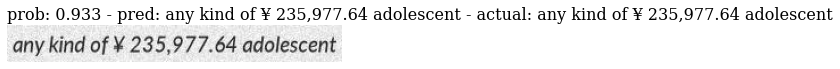

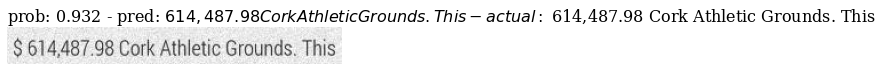

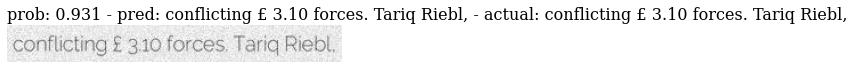

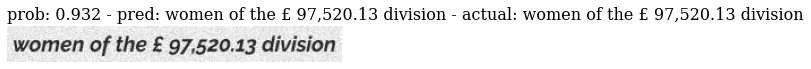

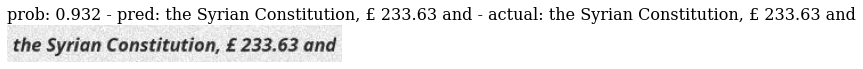

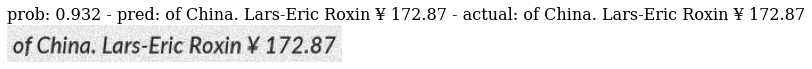

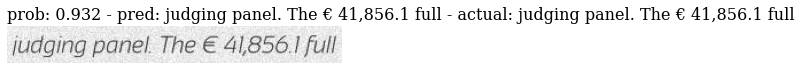

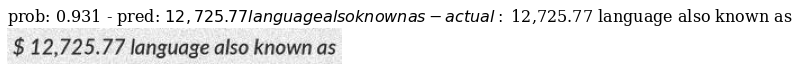

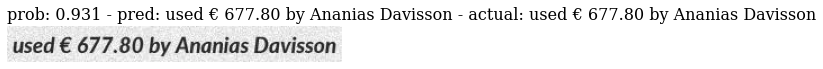

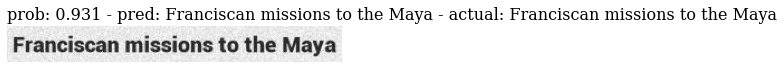

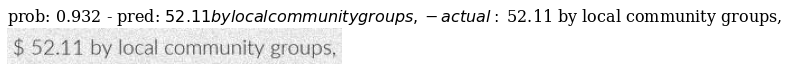

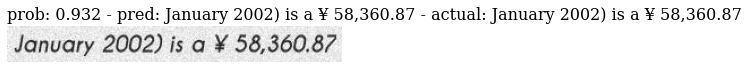

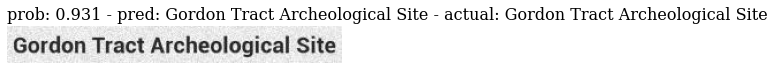

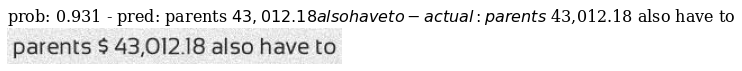

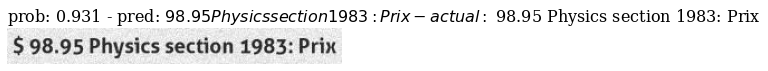

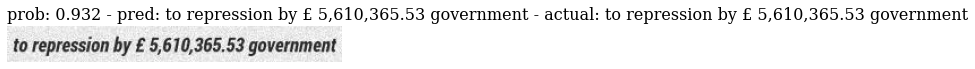

In [24]:
trainer.visualize_prediction()

In [25]:
trainer.precision()

(0.9513178380782918, 0.9787702)

In [26]:
trainer.config.save('config.yml')